<a href="https://colab.research.google.com/github/SatyamPrashant/ML-DS-Projects/blob/main/Internship_Project.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Title of Project**

Mileage Prdiction using Regression Analysis

## **Objective**

The objective of this project is to predict the mileage (miles per gallon or mpg) of cars using regression analysis based on features such as displacement, horsepower, weight, and acceleration.

## **Data Source**

The dataset is taken fom StatLib library which is maintained at Camegie Mellon University.

## **Import Library**

In [ ]:
import pandas as pd
import numpy as np
import matplotlib as plt
import seaborn as sns

## **Import Data**

In [ ]:
df = pd.read_csv('https://github.com/YBI-Foundation/Dataset/raw/main/MPG.csv')

## **Describe Data**

In [ ]:
df.head()

,mpg,cylinders,displacement,horsepower,weight,acceleration,model_year,origin,name
0,18.0,8,307.0,130.0,3504,12.0,70,usa,chevrolet chevelle malibu
1,15.0,8,350.0,165.0,3693,11.5,70,usa,buick skylark 320
2,18.0,8,318.0,150.0,3436,11.0,70,usa,plymouth satellite
3,16.0,8,304.0,150.0,3433,12.0,70,usa,amc rebel sst
4,17.0,8,302.0,140.0,3449,10.5,70,usa,ford torino


In [ ]:
df.describe()

,mpg,cylinders,displacement,horsepower,weight,acceleration,model_year
count,392.000000,392.000000,392.000000,392.000000,392.000000,392.000000,392.000000
mean,23.445918,5.471939,194.411990,104.469388,2977.584184,15.541327,75.979592
std,7.805007,1.705783,104.644004,38.491160,849.402560,2.758864,3.683737
min,9.000000,3.000000,68.000000,46.000000,1613.000000,8.000000,70.000000
25%,17.000000,4.000000,105.000000,75.000000,2225.250000,13.775000,73.000000
50%,22.750000,4.000000,151.000000,93.500000,2803.500000,15.500000,76.000000
75%,29.000000,8.000000,275.750000,126.000000,3614.750000,17.025000,79.000000
max,46.600000,8.000000,455.000000,230.000000,5140.000000,24.800000,82.000000


In [ ]:
df.nunique()

mpg             127
cylinders         5
displacement     81
horsepower       93
weight          346
acceleration     95
model_year       13
origin            3
name            301
dtype: int64

## **Data Visualization**

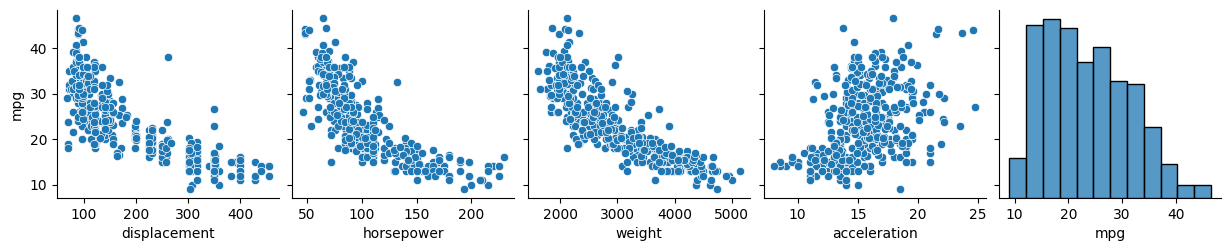

In [ ]:
sns.pairplot(df, x_vars = ['displacement', 'horsepower', 'weight', 'acceleration', 'mpg'], y_vars = ['mpg']);

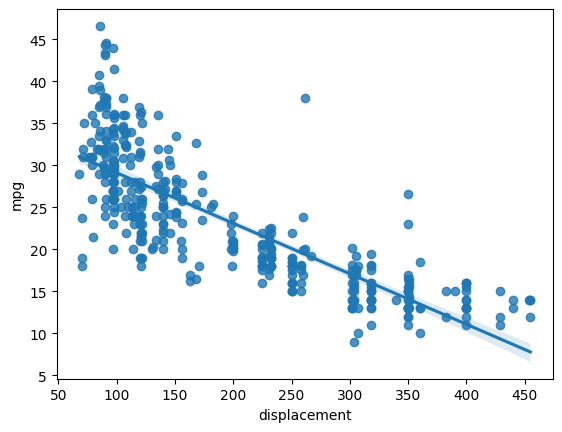

In [ ]:
sns.regplot(x = 'displacement', y = 'mpg', data = df);

## **Data Preprocessing**

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 398 entries, 0 to 397
Data columns (total 9 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   mpg           398 non-null    float64
 1   cylinders     398 non-null    int64  
 2   displacement  398 non-null    float64
 3   horsepower    392 non-null    float64
 4   weight        398 non-null    int64  
 5   acceleration  398 non-null    float64
 6   model_year    398 non-null    int64  
 7   origin        398 non-null    object 
 8   name          398 non-null    object 
dtypes: float64(4), int64(3), object(2)
memory usage: 28.1+ KB


In [ ]:
df = df.dropna()

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 392 entries, 0 to 397
Data columns (total 9 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   mpg           392 non-null    float64
 1   cylinders     392 non-null    int64  
 2   displacement  392 non-null    float64
 3   horsepower    392 non-null    float64
 4   weight        392 non-null    int64  
 5   acceleration  392 non-null    float64
 6   model_year    392 non-null    int64  
 7   origin        392 non-null    object 
 8   name          392 non-null    object 
dtypes: float64(4), int64(3), object(2)
memory usage: 30.6+ KB


## **Define Target Variable (y) and Feature Variables (X)**

In [ ]:
df.columns

Index(['mpg', 'cylinders', 'displacement', 'horsepower', 'weight',
       'acceleration', 'model_year', 'origin', 'name'],
      dtype='object')

In [ ]:
y = df['mpg']
y.shape

(392,)

In [ ]:
x = df[['displacement', 'horsepower', 'weight','acceleration']]
x.shape

(392, 4)

In [ ]:
x

,displacement,horsepower,weight,acceleration
0,307.0,130.0,3504,12.0
1,350.0,165.0,3693,11.5
2,318.0,150.0,3436,11.0
3,304.0,150.0,3433,12.0
4,302.0,140.0,3449,10.5
...,...,...,...,...
393,140.0,86.0,2790,15.6
394,97.0,52.0,2130,24.6
395,135.0,84.0,2295,11.6
396,120.0,79.0,2625,18.6


In [ ]:
#scaling the data
from sklearn.preprocessing import StandardScaler

In [ ]:
ss = StandardScaler()

In [ ]:
x = ss.fit_transform(x)

In [ ]:
x
# after standardization mean is zero and SD is 1.

array([[ 1.07728956,  0.66413273,  0.62054034, -1.285258  ],
       [ 1.48873169,  1.57459447,  0.84333403, -1.46672362],
       [ 1.1825422 ,  1.18439658,  0.54038176, -1.64818924],
       ...,
       [-0.56847897, -0.53247413, -0.80463202, -1.4304305 ],
       [-0.7120053 , -0.66254009, -0.41562716,  1.11008813],
       [-0.72157372, -0.58450051, -0.30364091,  1.40043312]])

In [ ]:
pd.DataFrame(x).describe()

,0,1,2,3
count,3.920000e+02,3.920000e+02,3.920000e+02,3.920000e+02
mean,-7.250436e-17,-1.812609e-16,-1.812609e-17,4.350262e-16
std,1.001278e+00,1.001278e+00,1.001278e+00,1.001278e+00
min,-1.209563e+00,-1.520975e+00,-1.608575e+00,-2.736983e+00
25%,-8.555316e-01,-7.665929e-01,-8.868535e-01,-6.410551e-01
50%,-4.153842e-01,-2.853488e-01,-2.052109e-01,-1.499869e-02
75%,7.782764e-01,5.600800e-01,7.510927e-01,5.384714e-01
max,2.493416e+00,3.265452e+00,2.549061e+00,3.360262e+00


## **Train Test Split**

In [ ]:
from sklearn.model_selection import train_test_split

In [ ]:
x_train, x_test, y_train, y_test = train_test_split(x, y, train_size = 0.7, random_state = 2529)

In [ ]:
x_train.shape, x_test.shape, y_train.shape, y_test.shape

((274, 4), (118, 4), (274,), (118,))

## **Modeling**

In [ ]:
from sklearn.linear_model import LinearRegression

In [ ]:
model = LinearRegression()

In [ ]:
model.fit(x_train, y_train)

LinearRegression()

In [ ]:
model.intercept_

23.485738559737584

In [ ]:
model.coef_

array([-1.05767743, -1.68734727, -4.10787617, -0.11495177])

## **Prediction**

In [ ]:
y_pred = model.predict(x_test)

In [ ]:
y_pred

array([18.51865637, 15.09305675, 14.30128789, 23.6753321 , 29.7546115 ,
       23.68796629, 26.61066644, 24.56692437, 15.06260986, 11.94312046,
       24.08050053, 27.96518468, 31.66130278, 31.01309132, 18.32428976,
       19.32795009, 28.08847536, 32.1506879 , 31.15859692, 27.15792144,
       18.82433097, 22.54580176, 26.15598115, 32.36393869, 20.74377679,
        8.78027518, 22.19699435, 18.20614294, 25.00052718, 15.26421552,
       23.13441082, 17.10542257,  9.87180062, 30.00790415, 20.41204655,
       29.11860245, 24.4305187 , 21.72601835, 10.51174626, 13.12426391,
       21.41938406, 19.96113872,  6.19146626, 17.79025345, 22.5493033 ,
       29.34765021, 13.4861847 , 25.88852083, 29.40406946, 22.41841964,
       22.07684766, 16.46575802, 24.06290693, 30.12890046, 10.11318121,
        9.85011438, 28.07543852, 23.41426617, 20.08501128, 30.68234133,
       20.92026393, 26.78370281, 22.9078744 , 14.15936872, 24.6439883 ,
       26.95515832, 15.25709393, 24.11272087, 30.80980589, 14.97

## **Model Evaluation**

In [ ]:
from sklearn.metrics import mean_absolute_error, mean_absolute_percentage_error, r2_score

In [ ]:
mean_absolute_error(y_test, y_pred)

3.3286968643244106

In [ ]:
mean_absolute_percentage_error(y_test, y_pred)

0.14713035779536746

In [ ]:
r2_score(y_test, y_pred)

0.7031250746717691

## **Explaination**

Import Libraries:

Importing necessary libraries: pandas for data manipulation, numpy for numerical operations, matplotlib and seaborn for data visualization.
Import Data:

Reading the dataset from an online source using pd.read_csv() and storing it in a dataframe df.
Describe Data:

df.head(): Displays the first few rows of the dataframe to get a quick overview of the data.
df.describe(): Provides summary statistics for numerical columns.
df.nunique(): Shows the number of unique values in each column.
Data Visualization:

sns.pairplot(): Creates pair plots to visualize relationships between features and the target variable mpg.
sns.regplot(): Plots a regression line between displacement and mpg.
Data Preprocessing:

df.info(): Provides information about the dataframe, including data types and counts of non-null values.
df.dropna(): Removes rows with missing values to clean the data.
Define Target Variable (y) and Feature Variables (X):

Defining y as the target variable (mpg).
Defining X as the feature variables (displacement, horsepower, weight, acceleration).
Scaling the Data:

Initializing a StandardScaler object and fitting it to the feature variables to standardize them. This ensures that each feature has a mean of zero and a standard deviation of one.
Train Test Split:

Splitting the data into training and testing sets using train_test_split() from sklearn. 70% of the data is used for training and 30% for testing.
Modeling:

Initializing a LinearRegression model and fitting it to the training data. The intercept and coefficients of the model are displayed.
Prediction:

Predicting the target variable for the test data using the fitted model.
Model Evaluation:

Evaluating the model using Mean Absolute Error (MAE), Mean Absolute Percentage Error (MAPE), and R-squared score (R2) to assess the performance of the regression model.


Import Libraries:

Importing necessary libraries: pandas for data manipulation, numpy for numerical operations, matplotlib and seaborn for data visualization.
Import Data:

Reading the dataset from an online source using pd.read_csv() and storing it in a dataframe df.
Describe Data:

df.head(): Displays the first few rows of the dataframe to get a quick overview of the data.
df.describe(): Provides summary statistics for numerical columns.
df.nunique(): Shows the number of unique values in each column.
Data Visualization:

sns.pairplot(): Creates pair plots to visualize relationships between features and the target variable mpg.
sns.regplot(): Plots a regression line between displacement and mpg.
Data Preprocessing:

df.info(): Provides information about the dataframe, including data types and counts of non-null values.
df.dropna(): Removes rows with missing values to clean the data.
Define Target Variable (y) and Feature Variables (X):

Defining y as the target variable (mpg).
Defining X as the feature variables (displacement, horsepower, weight, acceleration).
Scaling the Data:

Initializing a StandardScaler object and fitting it to the feature variables to standardize them. This ensures that each feature has a mean of zero and a standard deviation of one.
Train Test Split:

Splitting the data into training and testing sets using train_test_split() from sklearn. 70% of the data is used for training and 30% for testing.
Modeling:

Initializing a LinearRegression model and fitting it to the training data. The intercept and coefficients of the model are displayed.
Prediction:

Predicting the target variable for the test data using the fitted model.
Model Evaluation:

Evaluating the model using Mean Absolute Error (MAE), Mean Absolute Percentage Error (MAPE), and R-squared score (R2) to assess the performance of the regression model.
